In [1]:
import state_utils

state_utils.set_cohort("Poyet")
state_utils.set_host("an")
state_utils.set_midas_db_type("standard")

import matplotlib.pyplot as plt
import cPickle
import pandas as pd
import state_utils
import config
import figure_utils as fu
import numpy
from itertools import cycle
import scipy 

from sklearn import metrics 
from math import log
from parse_midas_data import parse_good_species_list
import sys
import os 
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import matplotlib as mpl

letter_list = ["A","B","C","D"]
color_mood = ["#a63a33","#378293","#f1c132","#3c414d","#d7d7de","#aaaaaa"]

good_species = parse_good_species_list()

dates = config.dates
dates_diff = dates.diff()
spec_df = pd.read_csv("%sspecies/relative_abundance.txt.bz2" % config.data_directory,index_col=0,sep="\t")

strain_tot_df = pd.DataFrame(columns=spec_df.columns)

cluster_min_SNV_size = config.cluster_min_SNV_size
strainfinder_dir = config.strainfinder_directory 
dates = config.dates

min_coverage = 5

tot_spec_strain_df = pd.DataFrame(columns = dates.index)

label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


In [2]:
plt.style.use("bmh")

In [3]:
good_species

['Bacteroides_vulgatus_57955',
 'Eubacterium_rectale_56927',
 'Bacteroides_uniformis_57318',
 'Bacteroides_xylanisolvens_57185',
 'Bacteroides_massiliensis_44749',
 'Bacteroides_clarus_62282',
 'Paraprevotella_clara_33712',
 'Ruminococcus_bromii_62047',
 'Sutterella_wadsworthensis_56828',
 'Alistipes_putredinis_61533',
 'Barnesiella_intestinihominis_62208']

In [4]:
species = "Bacteroides_vulgatus_57955"

sys.stderr.write("Processing %s \n\n" % species)

Processing Bacteroides_vulgatus_57955 



In [5]:
analysis_dir = config.analysis_directory
cluster_dir = "%s/clusters/Poyet/%s/%s" % (analysis_dir,config.host,species)

In [6]:
spec_df = spec_df[dates.loc[spec_df.columns].sort_values().index]

In [7]:
os.listdir(cluster_dir)

['Bacteroides_vulgatus_57955_cluster_1.csv.gz',
 'Bacteroides_vulgatus_57955_cluster_2.csv.gz',
 'Bacteroides_vulgatus_57955_cluster_3.csv.gz']

In [16]:
strain_snv_dic = {}
strain_centroid_dic = {}
i = 1
for strain in os.listdir(cluster_dir):
    
    df = pd.read_csv("%s/%s" % (cluster_dir,strain),index_col=0)
    strain_snv_dic[i] = df
    #strain_centroid_dic[i] = df.mean()
    strain_centroid_dic[i] = df.median()
    
    i+=1

In [17]:
DDF=pd.DataFrame(strain_centroid_dic)
#DDF[1] = 1 -DDF[1] 
#$DDF[3] = 1 -DDF[3] 

In [18]:
DDF.T.sum()

SRR9224203     1.007427
SRR9224313     1.000780
SRR9224314     1.003497
SRR9224321     1.008974
SRR9224184     1.007562
SRR9224323     1.031284
SRR9224322     1.008099
SRR9224325     1.007143
SRR9224324     1.028571
SRR9224327     1.010784
SRR9224187     1.001042
SRR9224318     1.017031
SRR9224317     0.997355
SRR9224139     1.004611
SRR9224138     1.005639
SRR9224137     0.998442
SRR9224136     1.001661
SRR9224143     0.998079
SRR9224142     0.979929
SRR9224134c    0.997383
SRR9224133     1.010207
SRR9224566     0.987701
SRR9224004     1.007878
SRR9224005     1.056444
SRR9224006     0.984889
SRR9224562     0.947935
SRR9224563     0.983686
SRR9224564     0.988660
SRR9224565     1.041197
SRR9224560     0.996596
SRR9224561     0.994322
SRR9224453     0.990340
SRR9224452c    0.975700
SRR9224454     0.959978
SRR9224449     0.961240
SRR9224448     0.923717
SRR9224451     0.943758
SRR9224450     0.977588
SRR9224457     0.978509
SRR9224456     0.994792
SRR9224279     1.001004
SRR9224280     0

In [ ]:
(1-strain_snv_dic[1]).to_csv("%s/Bacteroides_vulgatus_57955_cluster_1.csv.gz" % cluster_dir,compression="gzip")

In [ ]:
if len(strain_centroid_dic) == 1:
    strain_snv_dic[2] = 1 - strain_snv_dic[1]
    strain_centroid_dic[2] = 1 - strain_centroid_dic[1]

In [ ]:
strain_snv_dic[2] = 1 - strain_snv_dic[2]
strain_centroid_dic[2] = 1 - strain_centroid_dic[2]

In [19]:
spec_strain_df = pd.DataFrame(index=list(strain_centroid_dic.keys()),columns=spec_df.columns)
for i in strain_centroid_dic:
    spec_strain_df.loc[i] = spec_df.loc[species] * strain_centroid_dic[i]
    #spec_strain_df = spec_strain_df.dropna(axis=1, how='all')

In [20]:
spec_strain_df_plot = spec_strain_df.copy()

In [21]:
spec_strain_df_plot = spec_strain_df_plot.dropna(axis=1, how='all')

In [22]:

species_samples = spec_strain_df_plot.columns

In [23]:
spec_strain_df_plot.columns = dates.loc[species_samples]
spec_strain_df.index = ["%s_%s" % (species,letter_list[i]) for i in range(len(spec_strain_df.index))]

In [24]:
import matplotlib
matplotlib.rc('text', usetex = False)

In [25]:
for strain in strain_centroid_dic:
    strain_centroid_dic[strain] = strain_centroid_dic[strain].dropna()
    strain_snv_dic[strain] = strain_snv_dic[strain][strain_centroid_dic[strain].index]

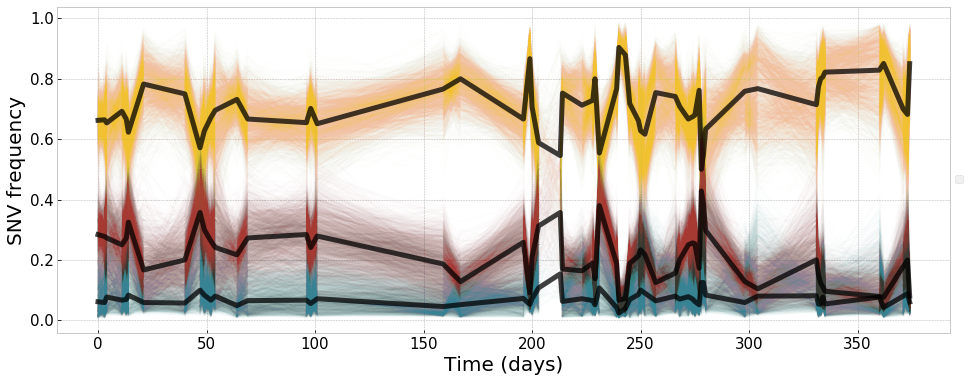

In [27]:
letter_list = ["A","B","C","D","E"]

fig,axs = plt.subplots(figsize=(16,6))

#fig.suptitle(fu.get_pretty_species_name(species),style="italic",size=30,x=0.26,y=.95,fontweight=30)
#
axs.set_facecolor("white")
axs.set_ylabel("SNV frequency",size=20)

axs.set_xlabel("Time (days)",size=20)
axs.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
#axs[0].get_xaxis().set_ticks([])
#axs[1].get_xaxis().set_ticks([])

strain_lines = []

i = 0
for strain in strain_centroid_dic:
    
    axs.plot(dates.loc[species_samples].values,strain_centroid_dic[strain],color="k",label=letter_list[i],lw=5,alpha=.75,zorder=10);
    
    if i == 1:
        xx = 2000
        yy = .009
        lww = 1.5
        
    else:
        xx = 2000
        yy = .009
        lww = 1.5
        
    C = strain_snv_dic[strain].sample(min(strain_snv_dic[strain].shape[0],xx)).T.values

    axs.plot(dates.loc[species_samples].values,C,lw=lww,color=color_mood[i],alpha=yy);
    
    strain_line = Line2D([0], [0], label=letter_list[i], color=color_mood[i])
    strain_lines.append(strain_line)
    
    i+=1

In [ ]:
letter_list = ["A","B","C","D","E"]

fig,axs = plt.subplots(2,1,figsize=(16,12))

fig.suptitle(fu.get_pretty_species_name(species),style="italic",size=30,x=0.26,y=.95,fontweight=30)
#
axs = axs.ravel()

axs[0].set_facecolor("white")
axs[0].set_ylabel("SNV frequency",size=20)


axs[0].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
#axs[0].get_xaxis().set_ticks([])
#axs[1].get_xaxis().set_ticks([])
axs[1].set_ylabel("Strain abundance",size=18);

strain_lines = []

i = 0
for strain in strain_centroid_dic:
    
    axs[0].plot(dates.loc[species_samples].values,strain_centroid_dic[strain],color="k",label=letter_list[i],lw=5,alpha=.75,zorder=10);

    #axs[0].plot(strain_centroid_dic[strain],color="k",lw=2,alpha=.75,zorder=10);
    
    if i == 1:
        xx = 4000
        yy = 1
        lww = 1.5
        
    else:
        xx = 4000
        yy = 1
        lww = 1.5
        
    C = strain_snv_dic[strain].sample(min(strain_snv_dic[strain].shape[0],xx)).T.values
#    axs[0].plot(C,lw=.5,color=color_mood[i],alpha=yy); 

    axs[0].plot(dates.loc[species_samples].values,C,lw=lww,color=color_mood[i],alpha=yy);
    #axs[0].plot(dates.loc[species_samples[25:45]].values,C[25:45],lw=1,color=color_mood[i],alpha=50*yy);
    
    strain_line = Line2D([0], [0], label=letter_list[i], color=color_mood[i])
    strain_lines.append(strain_line)
    
    i+=1

axs[0].legend(handles=strain_lines,loc='upper left', bbox_to_anchor=(1, 1.04),prop={'size':25},frameon=False)

#spec_strain_df.dropna(axis=1).T.plot.area(ax=axs[1],stacked=False,color=color_mood[:len(strain_centroid_dic)],legend=None)

spec_strain_df_plot.T.plot.area(ax=axs[1],stacked=False,color=color_mood[:len(strain_centroid_dic)],legend=None)

axs[1].set_xlabel("Time (days)",size=20);
axs[1].set_facecolor("white")

#fig.savefig("/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/Figures/cluster_figs/%s/%s_strain_fig.png" % (config.host,species))

fig.tight_layout()

In [ ]:
letter_list = ["A","B","C","D","E"]

fig,axs = plt.subplots(figsize=(16,6))

fig.suptitle(fu.get_pretty_species_name(species),style="italic",size=30,x=0.4,y=.95,fontweight=30)

axs.set_facecolor("white")
axs.set_ylabel("SNV frequency",size=20)


axs.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

strain_lines = []

i = 0
for strain in strain_centroid_dic:
    
    axs.plot(dates.loc[species_samples].values,strain_centroid_dic[strain],color="k",label=letter_list[i],lw=2,alpha=.75,zorder=10);
    
    if i == 2 or i == 1:
        xx = 6000
        yy = .01
        lww = 1
    else:
        xx = 4000
        yy = .005
        lww = 1
    C = strain_snv_dic[strain].sample(min(strain_snv_dic[strain].shape[0],xx)).T.values
#    axs[0].plot(C,lw=.5,color=color_mood[i],alpha=yy); 
    axs.plot(dates.loc[species_samples].values,C,lw=lww,color=color_mood[i],alpha=yy);
    axs.plot(dates.loc[species_samples[25:45]].values,C[25:45],lw=1.5,color=color_mood[i],alpha=50*yy);
    
    strain_line = Line2D([0], [0], label=letter_list[i], color=color_mood[i])
    strain_lines.append(strain_line)
    
    i+=1
        
axs.legend(handles=strain_lines,loc='upper left', bbox_to_anchor=(1, 1.04),prop={'size':25},frameon=False)

#axs.spines['right'].set_linewidth(5)
#axs.spines['top'].set_linewidth(5)
#axs.spines['bottom'].set_linewidth(5)
#axs.spines['left'].set_linewidth(5)


In [ ]:
xx = pd.read_csv("strains_an.csv",index_col=0)

In [ ]:
xx = xx.append(spec_strain_df)

In [ ]:
#xx.to_csv("strains_an.csv")

In [ ]:
tot_spec_strain_df = pd.concat([tot_spec_strain_df,spec_strain_df])

In [ ]:
tot_spec_strain_df

In [ ]:
#tot_spec_strain_df.to_csv("strains_ae.csv")

In [ ]:
clus1 = strain_centroid_dic[1].values
clus2 = strain_centroid_dic[2].values
clus3 = strain_centroid_dic[3].values

fig,ax = plt.subplots(figsize=(16,6))
ax.axhline(1,color="k",ls="--")

ax.set_facecolor("white")

ax.plot(dates.loc[species_samples].values,(1-clus1) + (clus2) + (clus3),label="Polarization 1",lw=7,zorder=10)
ax.plot(dates.loc[species_samples].values,clus1 + (1-clus2) + clus3,label="Polarization 2",lw=1)
ax.plot(dates.loc[species_samples].values,1-clus1 + (1-clus2) + (1-clus3),label="Polarization 3",lw=1)


ax.set_ylim([0,2.5])

ax.set_ylabel("Sum of strain frequencies",size=18)
ax.set_xlabel("Time (days)",size=18);

fig.legend()
#fig.savefig("/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/Figures/cluster_figs/%s/%s_polarizations.png" % (config.host,species))


In [ ]:
1-clus1

In [ ]:
1-clus2

In [ ]:
1-clus3

In [ ]:
GD = 30.5
GL = 19.61
GB = 15.15

In [ ]:
(GD + GL + GB)